Accuracy: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
SVM Classification Report:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0     19.0
1                   1.0     1.0       1.0     13.0
2                   1.0     1.0       1.0     13.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     45.0
weighted avg        1.0     1.0       1.0     45.0


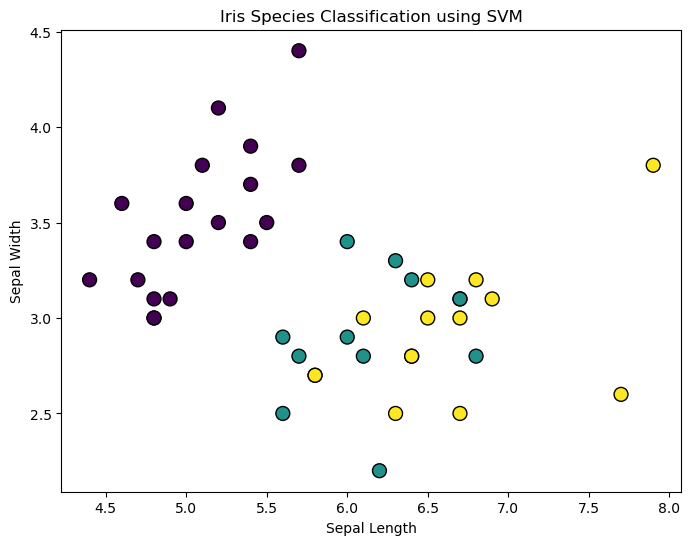


Summary:
      Metric  SVM Class 0  SVM Class 1  SVM Class 2
0  Precision          1.0          1.0          1.0
1     Recall          1.0          1.0          1.0


In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Labels (species)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize the SVM classifier
svm = SVC(kernel='linear')  # You can change kernel to 'rbf', 'poly', etc.

# Step 4: Fit the model on the training data
svm.fit(X_train, y_train)

# Step 5: Make predictions on the testing data
y_pred_svm = svm.predict(X_test)

# Step 6: Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

# Print the evaluation metrics
print(f"Accuracy: {accuracy_svm:.2f}")
print("Confusion Matrix:")
print(conf_matrix_svm)
print("SVM Classification Report:")
print(pd.DataFrame(class_report_svm).transpose())

# Optional: Visualize the results for the first two features
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_svm, cmap='viridis', edgecolor='k', s=100)
plt.title("Iris Species Classification using SVM")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

# Optional: Create a simple summary DataFrame for precision and recall
report_svm_df = pd.DataFrame(class_report_svm).transpose()
summary_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall'],
    'SVM Class 0': [report_svm_df.loc['0', 'precision'], report_svm_df.loc['0', 'recall']],
    'SVM Class 1': [report_svm_df.loc['1', 'precision'], report_svm_df.loc['1', 'recall']],
    'SVM Class 2': [report_svm_df.loc['2', 'precision'], report_svm_df.loc['2', 'recall']]
})
print("\nSummary:")
print(summary_df)
